## Preliminary

In [147]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from scipy.special import softmax

In [148]:
from sklearn.metrics import accuracy_score

In [149]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
os.chdir('D:\\Machine Learning Implementations')

In [151]:
df1 = pd.read_csv('student-mat.csv', sep = ';')
df2 = pd.read_csv('student-por.csv', sep = ';')

## EDA

*Understanding data dimensions*

In [152]:
print(df1.shape)
print(df2.shape)

(395, 33)
(649, 33)


In [153]:
df1.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [154]:
df_common = pd.merge(df1, df2, how = 'inner', on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'])

In [155]:
df_common.shape

(0, 33)

*Above investigation shows there are no two rows that are exactly the same (wrt all columns), in the two datasets
This was done taking ref from the data desc, which states that 382 students are common between the two datasets, however, it must be understood that the same students can have different parameters in different subjects, for eg. grades, absenteeism etc.
Hence, the two datasets can be safely merged.*

In [156]:
df = pd.concat([df1, df2], ignore_index = True) # pd.concat([df1, df2], axis = 0)
df.shape

(1044, 33)

In [157]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [158]:
df.tail(649)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
395,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
396,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
397,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
398,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
399,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [159]:
df.index.duplicated().sum()

0

In [160]:
df.columns == df1.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [161]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

*Renaming columns for better understandability*

In [162]:
df.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'parents_status', 'mother_edu', 'father_edu',
       'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_support', 'fam_support', 'paid_courses', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out', 'weekday_alc',
       'weekend_alc', 'health', 'absences', 'G1', 'G2', 'final_grade']

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          1044 non-null   object
 1   sex             1044 non-null   object
 2   age             1044 non-null   int64 
 3   address         1044 non-null   object
 4   fam_size        1044 non-null   object
 5   parents_status  1044 non-null   object
 6   mother_edu      1044 non-null   int64 
 7   father_edu      1044 non-null   int64 
 8   mother_job      1044 non-null   object
 9   father_job      1044 non-null   object
 10  reason          1044 non-null   object
 11  guardian        1044 non-null   object
 12  travel_time     1044 non-null   int64 
 13  study_time      1044 non-null   int64 
 14  failures        1044 non-null   int64 
 15  school_support  1044 non-null   object
 16  fam_support     1044 non-null   object
 17  paid_courses    1044 non-null   object
 18  activiti

In [164]:
df.head()

,school,sex,age,address,fam_size,parents_status,mother_edu,father_edu,mother_job,father_job,...,fam_rel,free_time,go_out,weekday_alc,weekend_alc,health,absences,G1,G2,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [165]:
df = df.drop_duplicates(subset = None, keep = 'first', inplace = False)
df.shape    #no duplicates in train_por

(1044, 33)

*No duplicates found*

In [166]:
df.columns[df.isna().any()]

Index([], dtype='object')

*No Nulls found*

In [167]:
df.describe()

,age,mother_edu,father_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,weekday_alc,weekend_alc,health,absences,G1,G2,final_grade
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


*Manipulation for effective analysis of the target variable final_grade*

In [168]:
sorted(df.final_grade.unique())

[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [169]:
np.where(df.columns == 'final_grade')

(array([32], dtype=int64),)

In [170]:
df['remarks'] = 'na'
df.iloc[0, 33] = 6
df.head()

,school,sex,age,address,fam_size,parents_status,mother_edu,father_edu,mother_job,father_job,...,free_time,go_out,weekday_alc,weekend_alc,health,absences,G1,G2,final_grade,remarks
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,na
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,na
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,na
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,na


In [171]:
for i in range(len(df.final_grade)):
    
    grade = df.iloc[i, 32]
    
    if grade <= 11:
        df.iloc[i, 33] = 'Poor'
        
    elif grade > 11 and grade <= 15:
        df.iloc[i, 33] = 'Fair'
        
    else:
        df.iloc[i, 33] = 'Excellent'

In [172]:
df.head()

,school,sex,age,address,fam_size,parents_status,mother_edu,father_edu,mother_job,father_job,...,free_time,go_out,weekday_alc,weekend_alc,health,absences,G1,G2,final_grade,remarks
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Poor
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Fair
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Poor


## Visualisation

<AxesSubplot:xlabel='final_grade'>

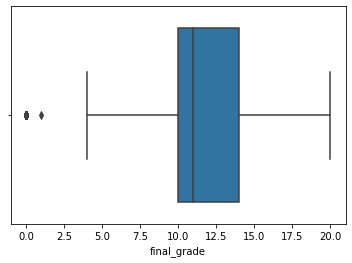

In [173]:
sns.boxplot(df.final_grade)

([<matplotlib.patches.Wedge at 0x17855608610>,
 [Text(-0.039712744462059885, 1.0992829016805872, 'Poor'),
  Text(-0.357498789928711, -1.040285833412869, 'Fair'),
  Text(1.0267010926711724, -0.3948225757322152, 'Excellent')],
 [Text(-0.02166149697930539, 0.5996088554621384, '51%'),
  Text(-0.19499933996111504, -0.5674286364070195, '37%'),
  Text(0.5600187778206395, -0.21535776858120825, '12%')])

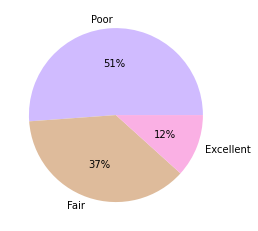

In [174]:
labels = df.remarks.unique()
data = []
for remark in labels:
    data.append(len(df.loc[df.remarks == remark, :]))

palette = sns.color_palette('pastel')[4:7]
plt.pie(data, labels = labels, colors = palette, autopct='%.0f%%')

*About half of the students perform 'Poorly' which is surely a matter of concern.
Apart from that, merely 12% of the students fall in the 'Excellent' category.*

<AxesSubplot:xlabel='remarks', ylabel='age'>

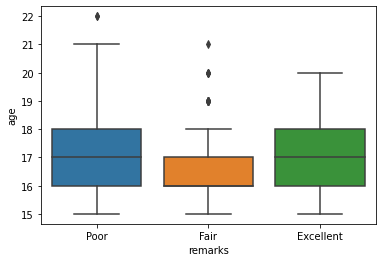

In [175]:
sns.boxplot(df.remarks, df.age)

In [176]:
df.columns

Index(['school', 'sex', 'age', 'address', 'fam_size', 'parents_status',
       'mother_edu', 'father_edu', 'mother_job', 'father_job', 'reason',
       'guardian', 'travel_time', 'study_time', 'failures', 'school_support',
       'fam_support', 'paid_courses', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'fam_rel', 'free_time', 'go_out', 'weekday_alc',
       'weekend_alc', 'health', 'absences', 'G1', 'G2', 'final_grade',
       'remarks'],
      dtype='object')

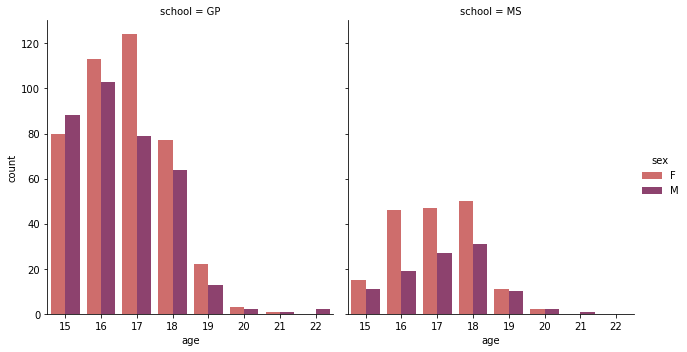

In [177]:
sns.catplot(x = 'age', hue = 'sex', col = 'school', data = df, kind = 'count', palette = 'flare', aspect = 0.9)

In [178]:
perc = (lambda col: col/col.sum())
index = ['Poor','Fair','Excellent']

Text(0.5, 0, 'Final Grade')

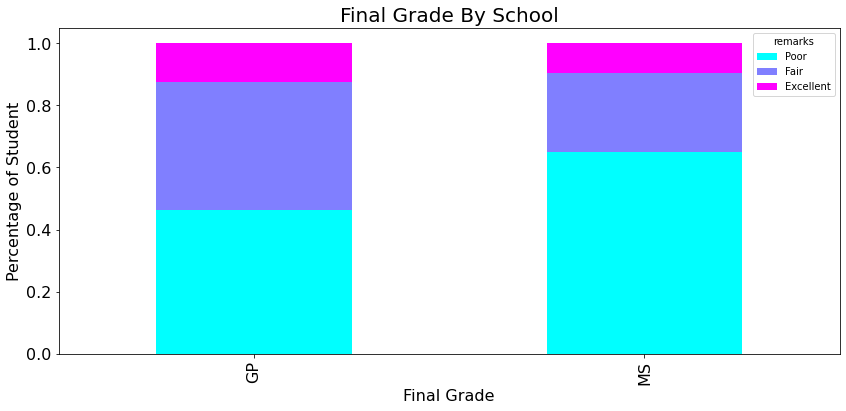

In [179]:
out_tab = pd.crosstab(df.remarks, df.school)
out_perc = out_tab.apply(perc).reindex(index)
out_perc = out_perc.T
out_perc.plot.bar(colormap="cool", fontsize=16, figsize=(14,6), stacked = True)
plt.title('Final Grade By School', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*The same result can be obtained by the code below, where, inside apply, axis = 1 instead of the default axis = 0. 
Hence, the frequency table doesn't need to be transposed before plotting, thereby making it more intuitive.
Apart from this, even the order of columns passed has been interchanged in pd.crosstab(), due to which, reindexing, if required, would need to be done with a different index.*

Text(0.5, 0, 'Final Grade')

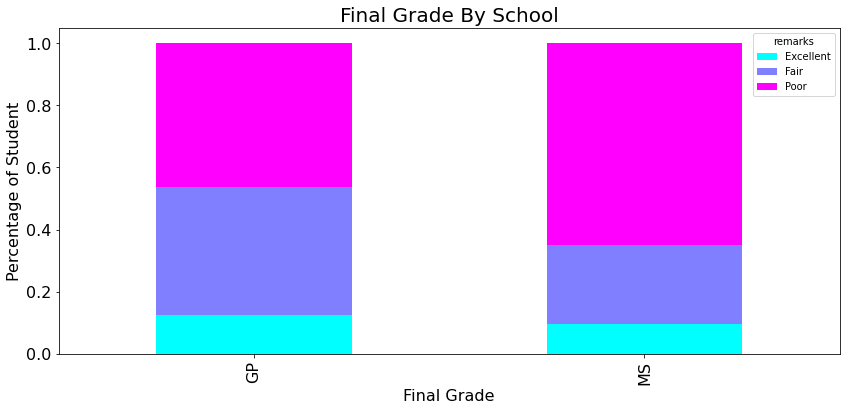

In [180]:
out_tab = pd.crosstab(df.school, df.remarks)
out_perc = out_tab.apply(perc, axis = 1)
out_perc.plot.bar(colormap="cool", fontsize=16, figsize=(14,6), stacked = True)
plt.title('Final Grade By School', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*Distribution of students is similar for both the schools. However GP school has a much lower percentage of students falling in the 'Poor' category.
Hence, it can be concluded as a better choice for students than MS school.*

Text(0.5, 0, 'Final Grade')

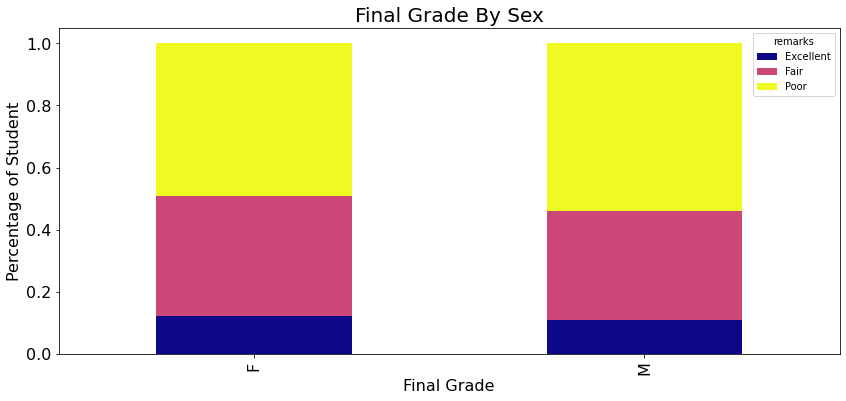

In [181]:
out_tab = pd.crosstab(df.remarks, df.sex)
out_perc = out_tab.apply(perc)
out_perc = out_perc.T
out_perc.plot.bar(colormap = "plasma", fontsize = 16, figsize = (14,6), stacked = True)
plt.title('Final Grade By Sex', fontsize = 20)
plt.ylabel('Percentage of Student', fontsize = 16)
plt.xlabel('Final Grade', fontsize = 16)

<AxesSubplot:xlabel='sex', ylabel='final_grade'>

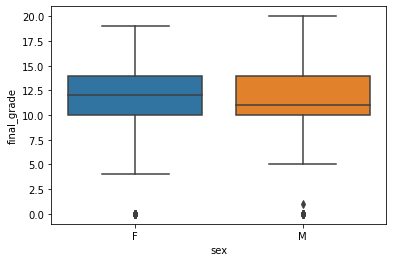

In [183]:
sns.boxplot(df.sex, df.final_grade)

*Academic performance is mostly independent of gender. However the boxplot shows that females have a higher mean score*

Text(0.5, 0, 'Final Grade')

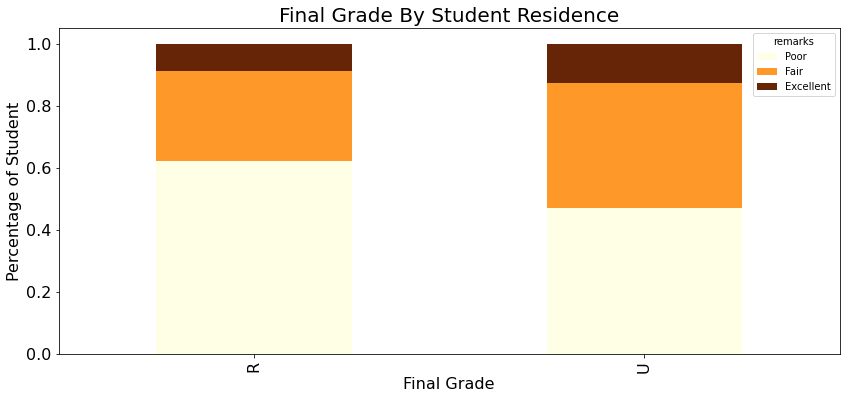

In [184]:
out_tab = pd.crosstab(df.remarks, df.address)
out_perc = out_tab.apply(perc).reindex(index)
out_perc = out_perc.T
out_perc.plot.bar(colormap="YlOrBr", fontsize=16, figsize=(14,6), stacked = True)
plt.title('Final Grade By Student Residence', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*Students from rural areas have a greater probability of having a 'Poor' performance than those living in the urban areas*

Text(0.5, 0, 'Final Grade')

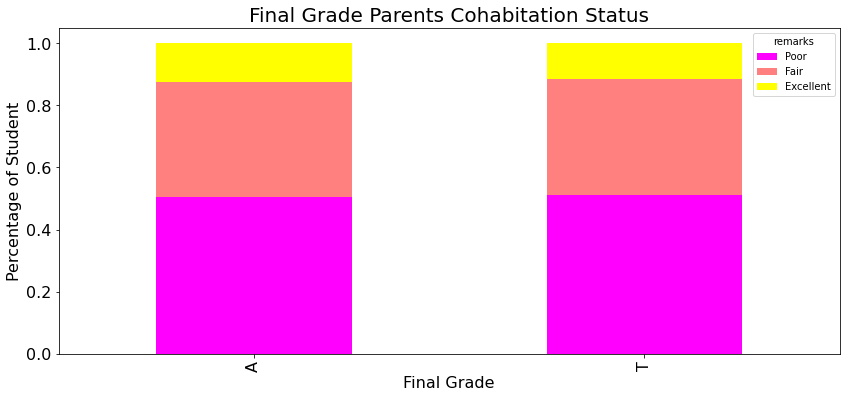

In [185]:
out_tab = pd.crosstab(df.remarks, df.parents_status)
out_perc = out_tab.apply(perc).reindex(index)
out_perc = out_perc.T
out_perc.plot.bar(colormap="spring", fontsize=16, figsize=(14,6), stacked = True)
plt.title('Final Grade Parents Cohabitation Status', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*Parents cohabitation status does not seem to have a significant impact on student performance.*

Text(0.5, 0, 'Final Grade')

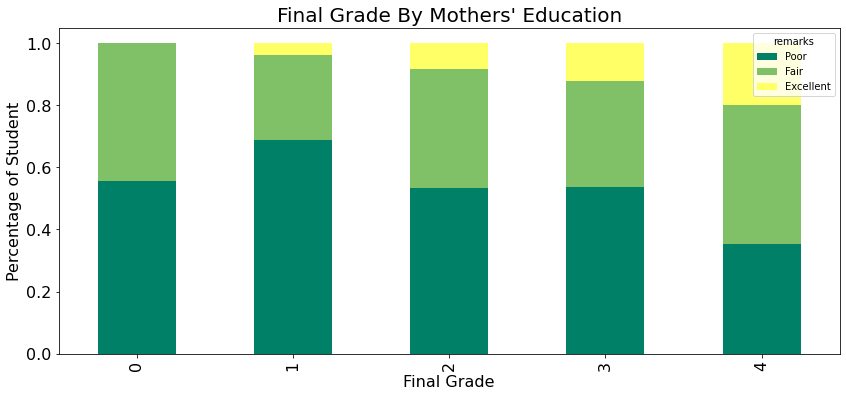

In [186]:
out_tab = pd.crosstab(df.remarks, df.mother_edu)
out_perc = out_tab.apply(perc).reindex(index)
out_perc = out_perc.T
out_perc.plot.bar(colormap="summer", fontsize=16, figsize=(14,6), stacked = True)
plt.title("Final Grade By Mothers' Education", fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*Quite interestingly, as the level of mothers' education increases, the proportion of students with 'Excellent' performance increases.
Hence, mothers' education has a positive correlation on the childs' performance.*

Text(0.5, 0, 'Final Grade')

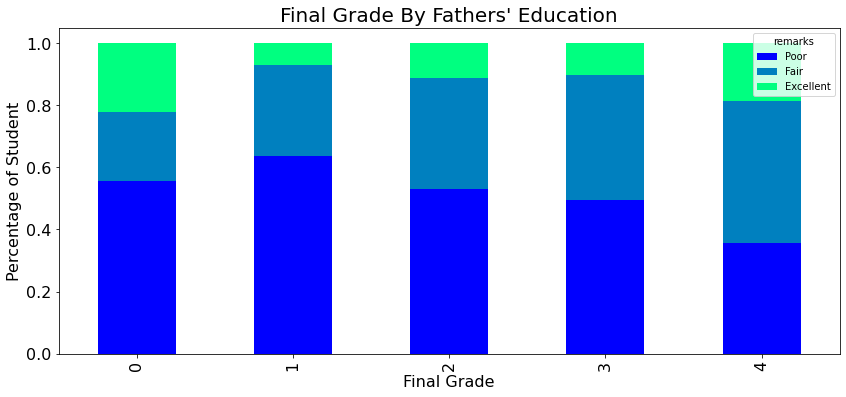

In [187]:
out_tab = pd.crosstab(df.remarks, df.father_edu)
out_perc = out_tab.apply(perc).reindex(index)
out_perc = out_perc.T
out_perc.plot.bar(colormap="winter", fontsize=16, figsize=(14,6), stacked = True)
plt.title("Final Grade By Fathers' Education", fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*Fathers' education doesn't seem to affect the childs' academic performance significantly.*

Text(0.5, 0, 'Final Grade')

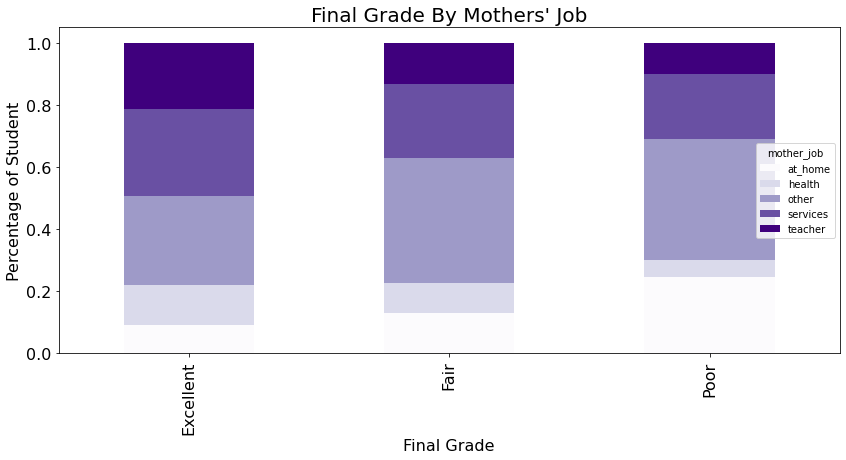

In [188]:
out_tab = pd.crosstab(df.mother_job, df.remarks)
out_perc = out_tab.apply(perc)
out_perc = out_perc.T
out_perc.plot.bar(colormap="Purples", fontsize=16, figsize=(14,6), stacked = True)
plt.title("Final Grade By Mothers' Job", fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*The proportion of various jobs seems to be the same, more or less.
However, it is interesting to observe that students who perform poorly are least likely to have mothers who work in the healthcare sector.*

<AxesSubplot:xlabel='mother_job', ylabel='final_grade'>

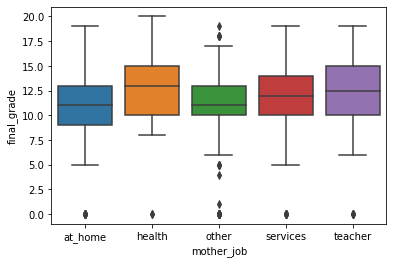

In [189]:
sns.boxplot(df.mother_job, df.final_grade)

*The bosplot confirms the finding as children with mothers in the healthcare sector have the highest mean score*

Text(0.5, 0, 'Final Grade')

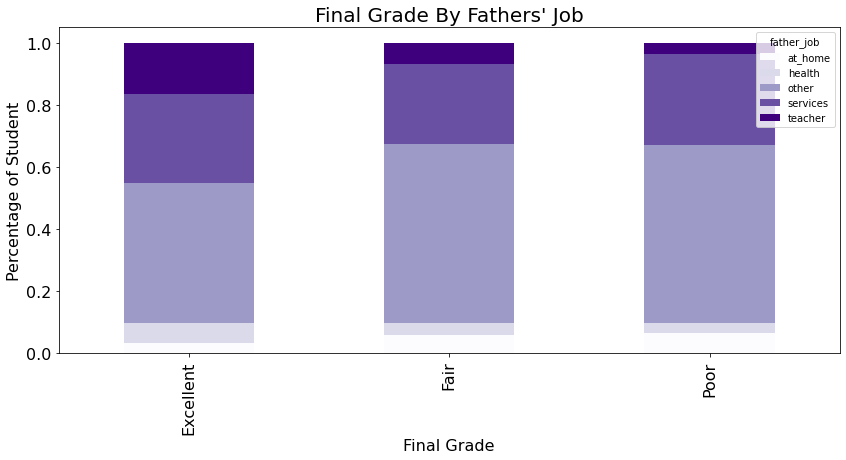

In [190]:
out_tab = pd.crosstab(df.father_job, df.remarks)
out_perc = out_tab.apply(perc)
out_perc = out_perc.T
out_perc.plot.bar(colormap="Purples", fontsize=16, figsize=(14,6), stacked = True)
plt.title("Final Grade By Fathers' Job", fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

Text(0.5, 0, 'Final Grade')

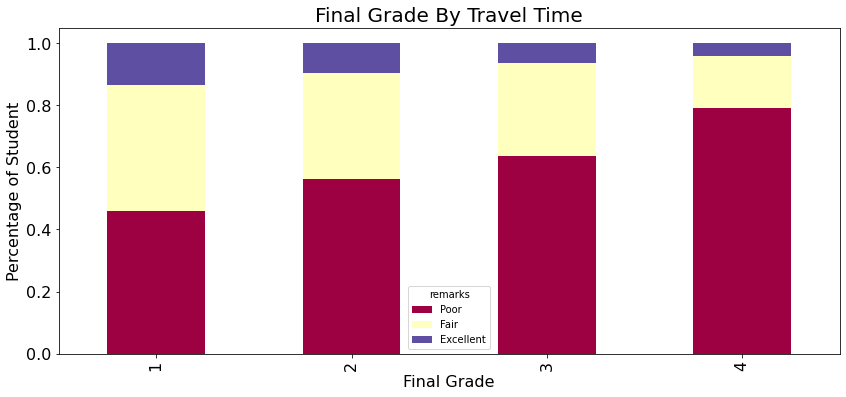

In [191]:
out_tab = pd.crosstab(df.remarks, df.travel_time)
out_perc = out_tab.apply(perc).reindex(index)
out_perc = out_perc.T
out_perc.plot.bar(colormap="Spectral", fontsize=16, figsize=(14,6), stacked = True)
plt.title('Final Grade By Travel Time', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

<AxesSubplot:xlabel='travel_time', ylabel='final_grade'>

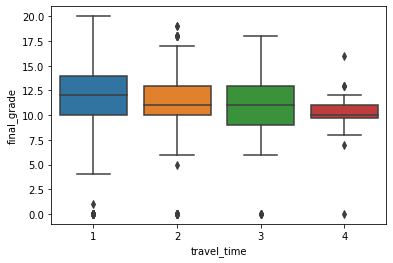

In [192]:
sns.boxplot(df.travel_time, df.final_grade)

*Clearly, as travel time for students increases, the likelihood of 'Poor' academic performance increases, and hence that of 'Excellent' or 'Fair' performance decreases. Less travel time corresponds to better performance.*

Text(0.5, 0, 'Final Grade')

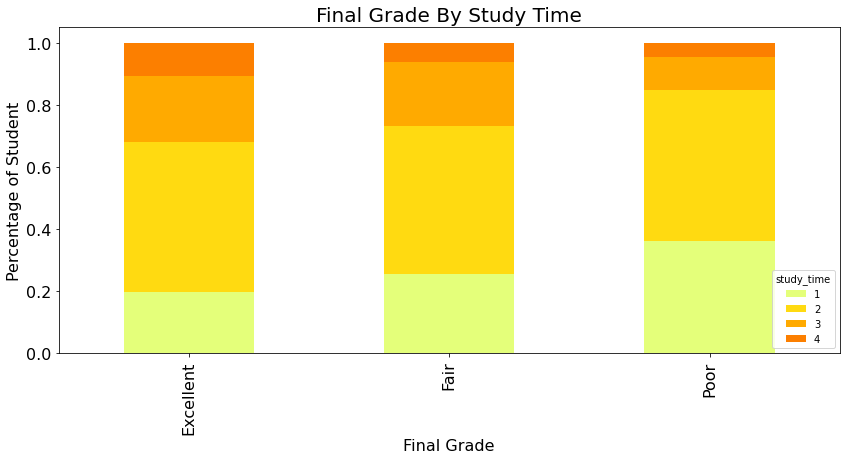

In [193]:
out_tab = pd.crosstab(df.study_time, df.remarks)
out_perc = out_tab.apply(perc)
out_perc = out_perc.T
out_perc.plot.bar(colormap="Wistia", fontsize=16, figsize=(14,6), stacked = True)
plt.title('Final Grade By Study Time', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*On one hand where quite obviously, students with a 'Poor' performance are least likely to have a study-time of level 4 i.e >10 hours, we notice that the same is true for students with an 'Excellent' or 'Fair' performance which is quite opposite to what is expected.
The difference in performance inspite of similar study times, could be due to difference focus-levels and productivity.*

Text(0.5, 0, 'Final Grade')

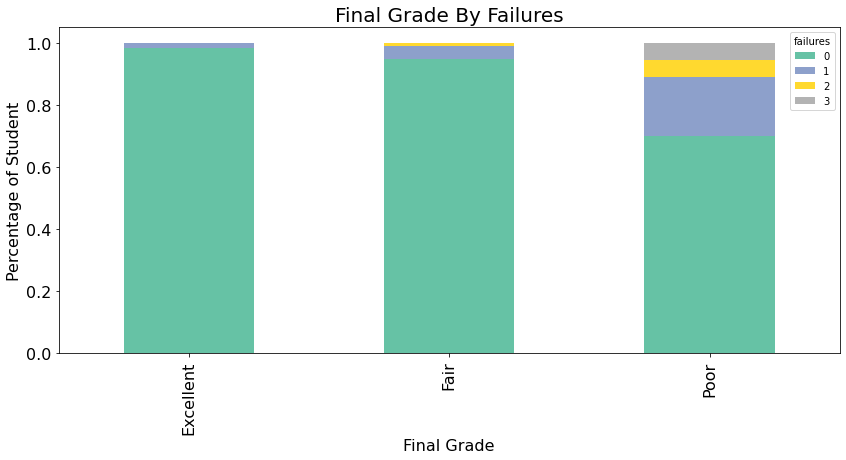

In [194]:
out_tab = pd.crosstab(df.failures, df.remarks)
out_perc = out_tab.apply(perc)
out_perc = out_perc.T
out_perc.plot.bar(colormap="Set2", fontsize=16, figsize=(14,6), stacked = True)
plt.title('Final Grade By Failures', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*As expected, students with 'Excellent' performance are most likely to have 0 failures.
But the trend isn't really worse for the 'Poor' performers, who again tend to have no failures.*

Text(0.5, 0, 'Final Grade')

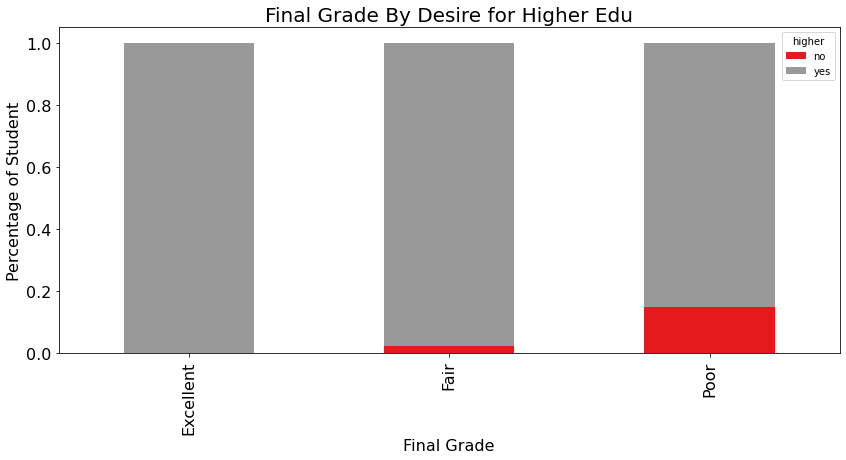

In [195]:
out_tab = pd.crosstab(df.higher, df.remarks)
out_perc = out_tab.apply(perc)
out_perc = out_perc.T
out_perc.plot.bar(colormap="Set1", fontsize=16, figsize=(14,6), stacked = True)
plt.title('Final Grade By Desire for Higher Edu', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*Notably, 'Excellent' students will certainly want to take up higher education.
Quite pleasantly, students who may not be performing so well currently ('Poor' and 'Fair'), still feel positively about higher education.*

Text(0.5, 0, 'Final Grade')

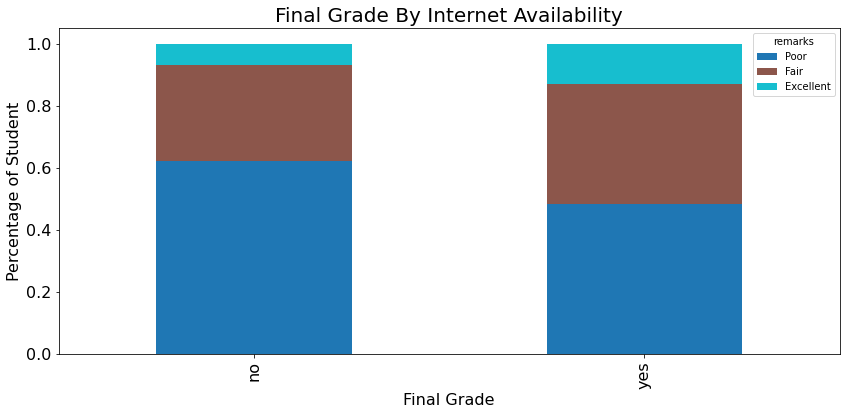

In [196]:
out_tab = pd.crosstab(df.remarks, df.internet)
out_perc = out_tab.apply(perc).reindex(index)
out_perc = out_perc.T
out_perc.plot.bar(colormap="tab10", fontsize=16, figsize=(14,6), stacked = True)
plt.title('Final Grade By Internet Availability', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*Here we see that mostly students with/without internet availability have a pretty similar performance. However, students with internet access, are more likely to perform better than those without it.*

In [293]:
dfd = df.copy()

In [295]:
dfd.columns

Index(['school', 'sex', 'age', 'address', 'fam_size', 'parents_status',
       'mother_edu', 'father_edu', 'mother_job', 'father_job', 'reason',
       'guardian', 'travel_time', 'study_time', 'failures', 'school_support',
       'fam_support', 'paid_courses', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'fam_rel', 'free_time', 'go_out', 'weekday_alc',
       'weekend_alc', 'health', 'absences', 'G1', 'G2', 'final_grade',
       'remarks'],
      dtype='object')

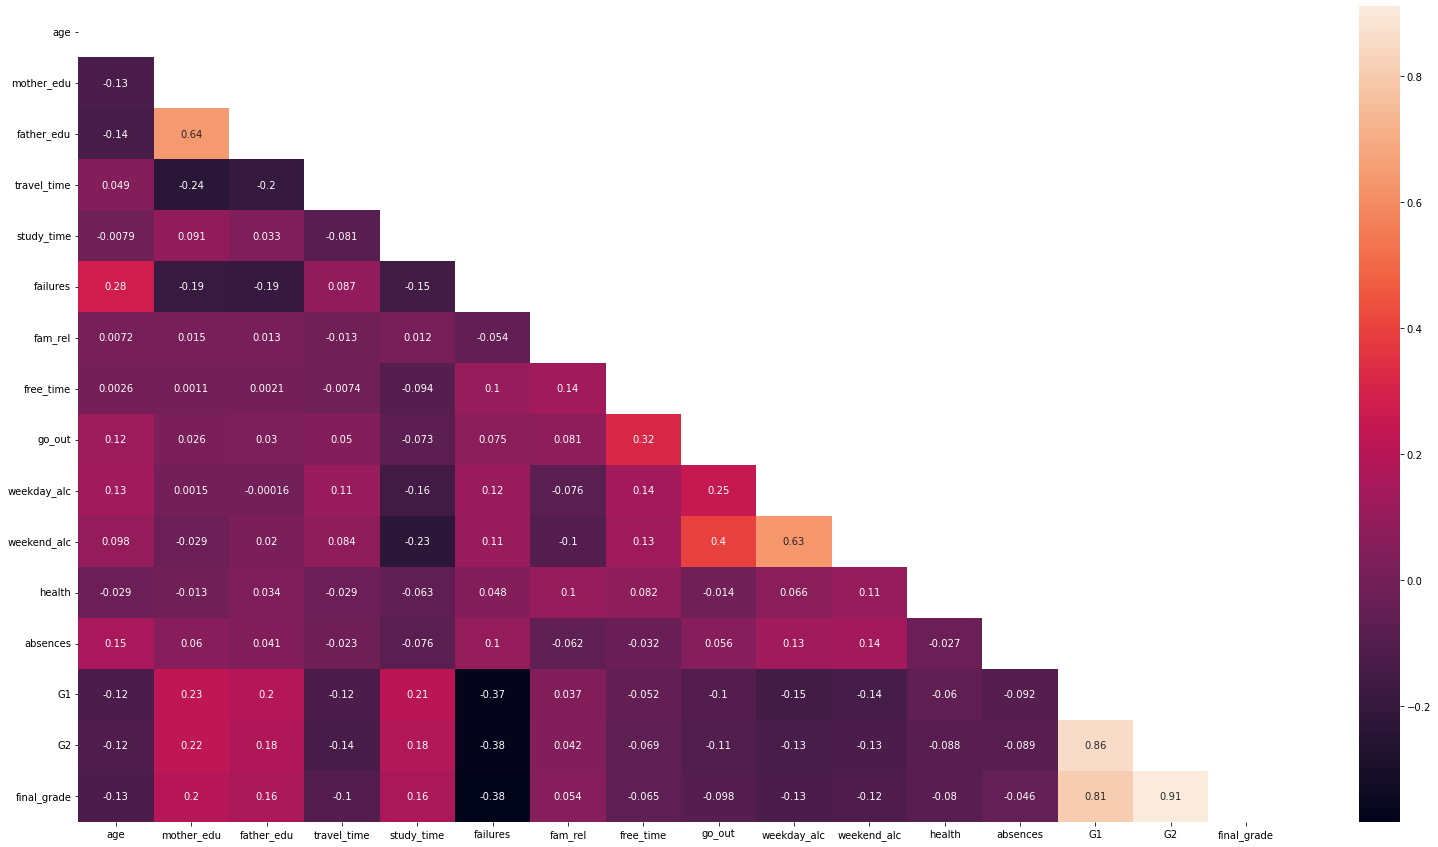

In [296]:
corr = dfd.corr()
mat = np.triu(corr)
fig, ax = plt.subplots(figsize=(27, 15))
sns.heatmap(corr, annot=True, mask = mat)
plt.show()

*Removing the target variable, as well as the least correlated columns.*

In [297]:
X = pd.get_dummies(dfd.drop(['final_grade', 'remarks', 'sex', 'fam_size', 'parents_status', 'father_job', 'guardian', 'school_support', 'fam_support', 'paid_courses', 'activities', 'nursery', 'fam_rel', 'free_time', 'absences'], axis=1))
y = dfd.remarks

## Train test split

In [298]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 10)

## Applying, evaluating the model

In [299]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

In [300]:
model.score(xtest, ytest)

0.8821656050955414

*The model is nearly 90% accurate*